<a href="https://colab.research.google.com/github/Jaisri15/Internship-Jaisri/blob/main/BIG_MART_SALAES(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
#importing the required libraries for the Analysis of the project.

#Loading of Data

In [2]:
train = pd.read_csv('/content/drive/MyDrive/DataSets/Big_Mart Dataset/Train.csv')
# import necessary libraries and load dataset.

In [3]:
test = pd.read_csv('/content/drive/MyDrive/DataSets/Big_Mart Dataset/Test.csv')
# import necessary libraries and load dataset.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train=pd.read_csv('/content/drive/MyDrive/DataSets/Big_Mart Dataset/Train.csv')

In [6]:
test=pd.read_csv('/content/drive/MyDrive/DataSets/Big_Mart Dataset/Test.csv')

#Data structure and content


In [7]:
train.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set.

(8523, 12)

In [8]:
train.columns
# display coloumn names

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
train.isnull().sum()
#display number of missing values of each column

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [10]:
train.dtypes
#display the data type of each column

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [11]:
train.duplicated()
# check for duplicated rows

,0
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [12]:
train.info()
#display information about the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
train.describe()
#display discriptive statistics

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
train.head()
#display first few rows of the datasets

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
train['Item_Type'].value_counts()
#display value counts for 'Item_Type'

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [16]:
train['Item_Fat_Content'].value_counts()
#display value counts for 'Item_Fat_Content

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [17]:
test.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set.

(5681, 11)

In [18]:
test.columns
# display coloumn names

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [19]:
test.isnull().sum()
#display number of missing values of each column

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [20]:
test.dtypes
#display the data type of each column

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [21]:
test.duplicated()
#check for duplicated rows

,0
0,False
1,False
2,False
3,False
4,False
...,...
5676,False
5677,False
5678,False
5679,False


In [22]:
test.info()
#display information about the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [23]:
test.describe()
#display discriptive statistics

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [24]:
test.head()
#display first few rows of the datasets

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [25]:
test['Item_Type'].value_counts()
#display value counts for 'Item_Type'

,count
Item_Type,
Snack Foods,789
Fruits and Vegetables,781
Household,638
Frozen Foods,570
Dairy,454
Baking Goods,438
Canned,435
Health and Hygiene,338
Meat,311


In [26]:
test['Item_Fat_Content'].value_counts()
#display value counts for 'Item_Fat_Content'

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


#DATA STRUCTURE AND CONTENT

DATA PREPROCESSING

In [27]:
train['Item_Fat_Content'].value_counts()
#display value counts for 'Item_Fat_Content'

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [28]:
train['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [29]:
train['Item_Fat_Content'].value_counts()
#display updated value counts for 'Item_Fat_Content'

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [30]:
test['Item_Fat_Content'].value_counts()
#display value counts for 'Item_Fat_Content'

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [31]:
test['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
# replace inconsistent values in 'Item_Fat_Content'

In [32]:
test['Item_Fat_Content'].value_counts()
#display updated value counts for 'Item_Fat_Content'

,count
Item_Fat_Content,
Low Fat,3668
Regular,2013


#Explaratory data analysis

Uni variate analysis

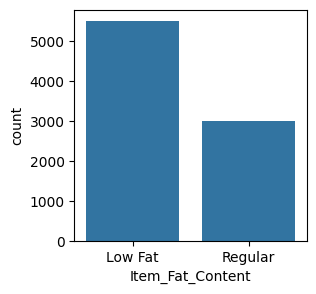

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
plt.figure(figsize=(3,3))
sns.countplot(x='Item_Fat_Content',data=train)
plt.xlabel('Item_Fat_Content')
plt.show()
# A countplot is a type of data visualization used in python.
# It is particularly useful for visualising the count occurences of each unique value.
# The sns.countplot function is used to create the count plot.
# The items have more low fat content and moderate regular fat content.

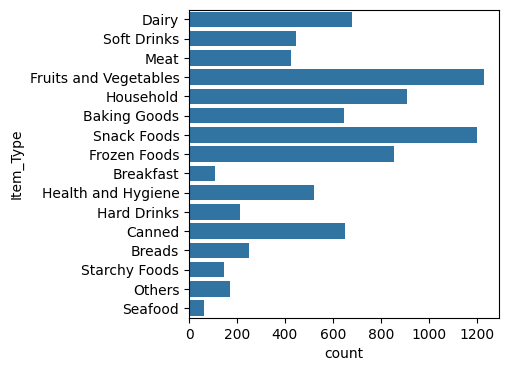

In [34]:
plt.figure(figsize=(4,4))
sns.countplot(y='Item_Type',data=train)
plt.ylabel('Item_Type')
plt.show()

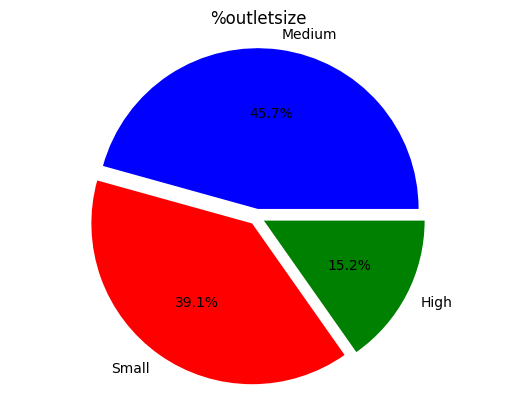

In [35]:
outletsize=train['Outlet_Size'].value_counts(normalize=True)*100
explode=(0.05,0.05,0.05)
colors=('blue','red','green')
plt.pie(outletsize,labels=outletsize.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('%outletsize')
plt.axis('equal')
plt.show()


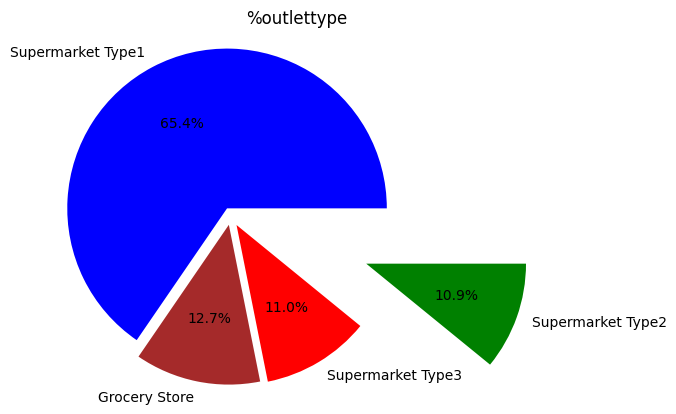

In [36]:
outlettype=train['Outlet_Type'].value_counts(normalize=True)*100
explode=(0.05,0.06,0.07,0.9)
colors=('blue','brown','red','green')
plt.pie(outlettype,labels=outlettype.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('%outlettype')
plt.axis('equal')
plt.show()

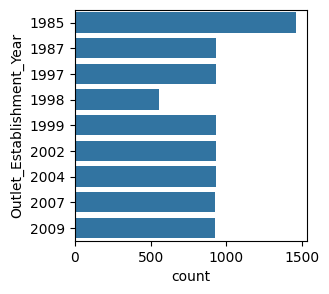

In [37]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Establishment_Year',data=train)
plt.ylabel('Outlet_Establishment_Year')
plt.show()

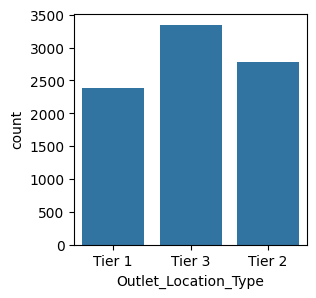

In [38]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Location_Type',data=train)
plt.xlabel('Outlet_Location_Type')
plt.show()

#To handle the Missing and catagorical values

In [39]:
train['Outlet_Size'].dtypes
#display the data type of 'Outlet_Size' column

dtype('O')

In [40]:
train.head()
#display updated few rows of the datasets


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [42]:
test['Outlet_Size'].dtypes
#display the data type of 'Outlet_Size' column

dtype('O')

In [43]:
test.head()
#display updated few rows of the datasets

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [44]:
test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


#Handling the outlier

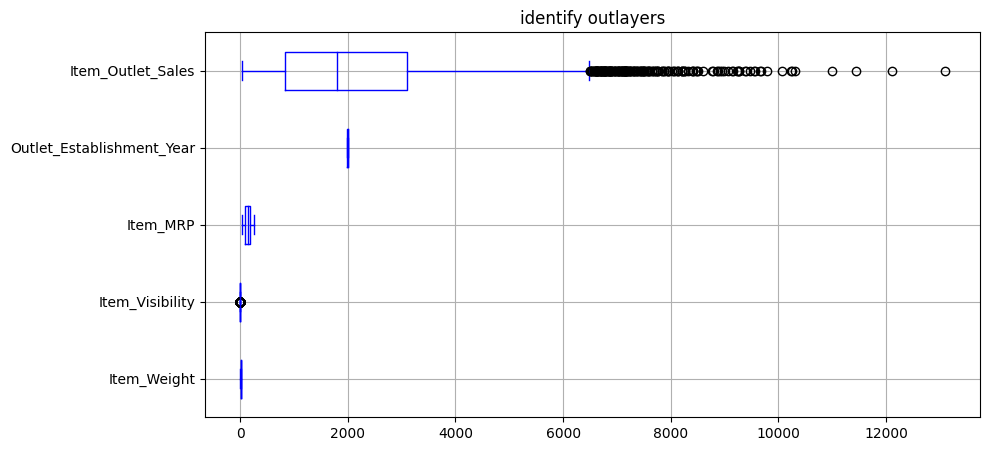

In [45]:
number_coloumns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_coloumns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outlayers')
plt.show()

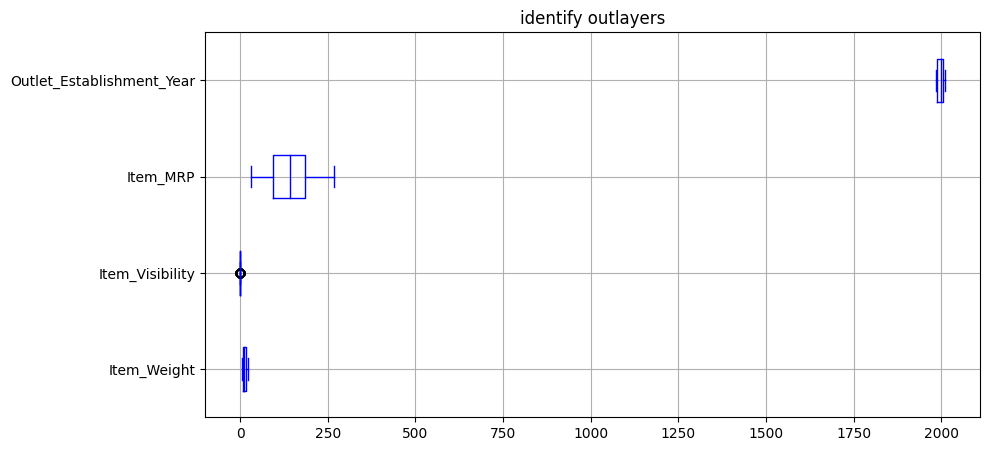

In [46]:
number_coloumns=test.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_coloumns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outlayers')
plt.show()

 Cube root transormation

In [47]:
q1=np.percentile(train['Item_Outlet_Sales'],25)
q3=np.percentile(train['Item_Outlet_Sales'],75)
iqr=q3-q1
print('q1',q1)
print('q3',q3)
print('IQR',iqr)

q1 834.2474
q3 3101.2964
IQR 2267.049


In [48]:
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
print('upperlimit',upperlimit)
print('lowerlimit',lowerlimit)

upperlimit 6501.8699
lowerlimit -2566.3261


Cube transformation

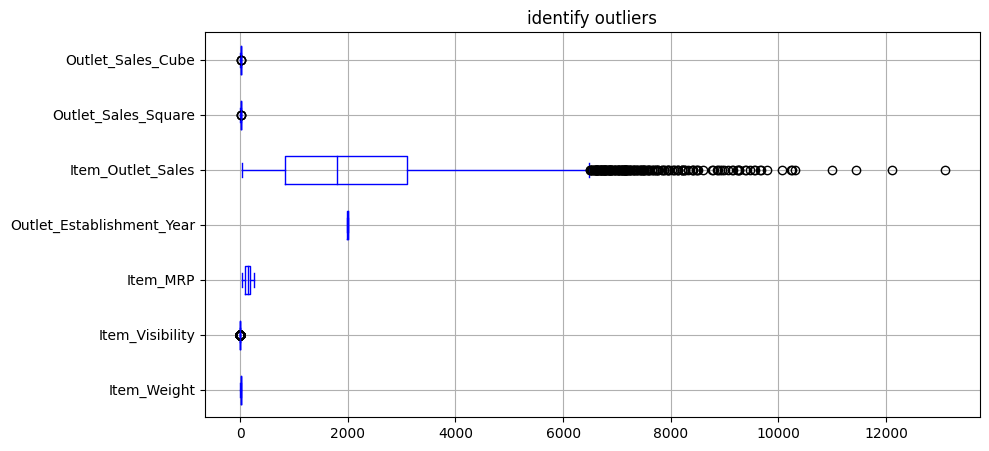

In [49]:
train['Outlet_Sales_Square']=np.cbrt(train['Item_Outlet_Sales'])
train['Outlet_Sales_Cube']=np.cbrt(train['Item_Outlet_Sales'])
number_columns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outliers')
plt.show()

Squareroot transformation

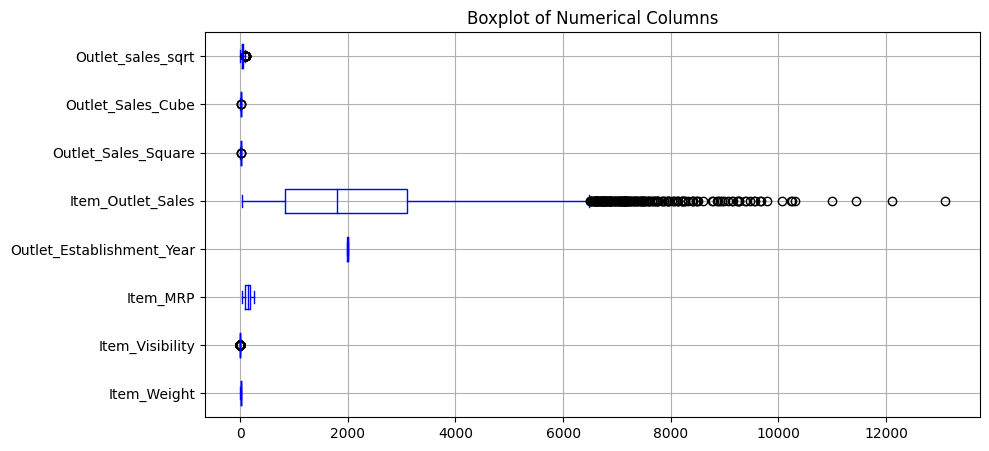

In [50]:
train['Outlet_sales_sqrt']=np.sqrt(train['Item_Outlet_Sales'])
#to get the square root value of the particular outlier


number_columns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('Boxplot of Numerical Columns')
plt.show()# the outliers are present in the Outlet_sales_cube and item visiblity

<ipython-input-51-e027f0557108>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Outlet_sales_sqrt'],kde=True,rug=True)


<Axes: xlabel='Outlet_sales_sqrt', ylabel='Density'>

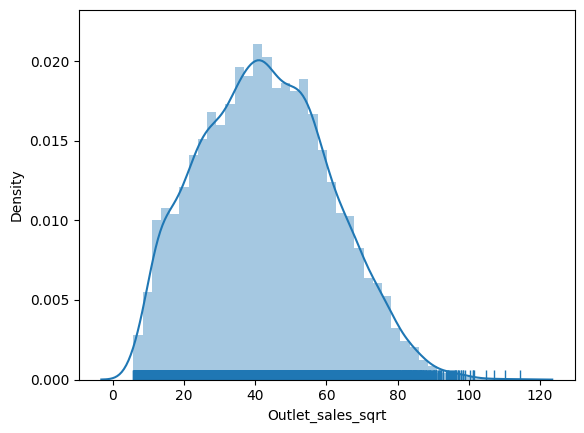

In [51]:
sns.distplot(train['Outlet_sales_sqrt'],kde=True,rug=True)
#transform square root to bell shaped

Bi variate Analysis

<ipython-input-52-2c7d3778c2e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Item_Outlet_Sales'],kde=True ,rug=True)


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

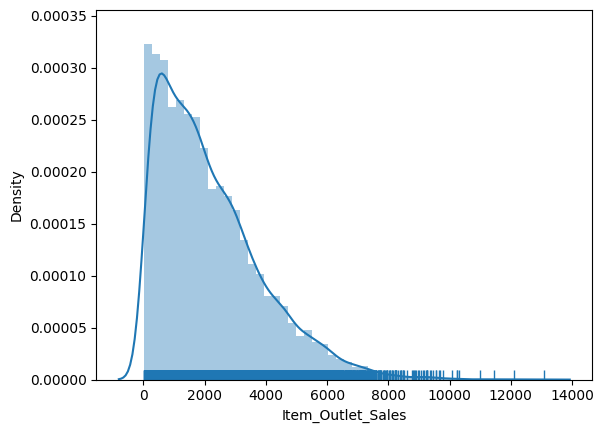

In [52]:
sns.distplot(a=train['Item_Outlet_Sales'],kde=True ,rug=True)

<ipython-input-53-ca45caa581af>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Outlet_Sales_Cube'],kde=True ,rug=True)


<Axes: xlabel='Outlet_Sales_Cube', ylabel='Density'>

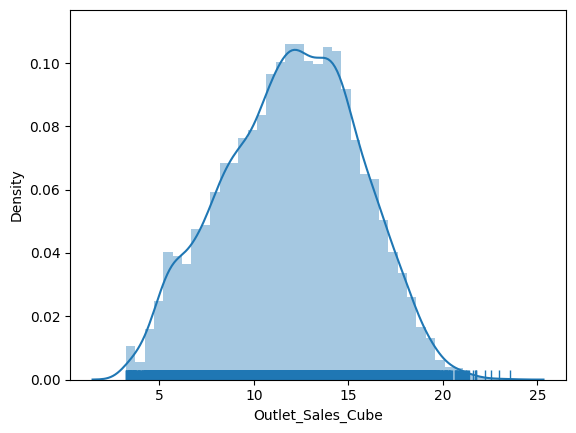

In [53]:
sns.distplot(a=train['Outlet_Sales_Cube'],kde=True ,rug=True)

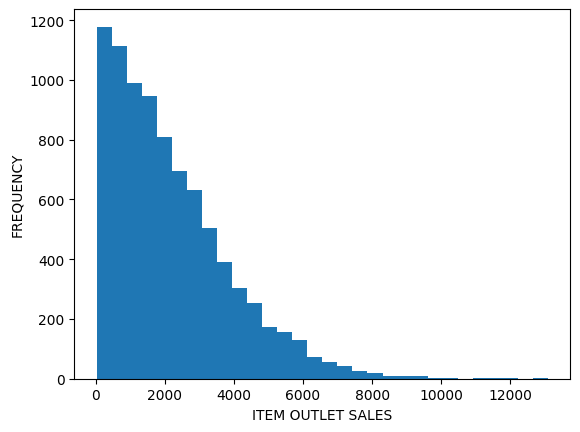

In [54]:
#graphing the histogram from the matplotlib library for the Item Outlet Sales Column.
plt.hist(train['Item_Outlet_Sales'],bins=30)
#labeing the x and y axses in the graph.
plt.xlabel("ITEM OUTLET SALES")
plt.ylabel("FREQUENCY")
#visualising the graph
plt.show()

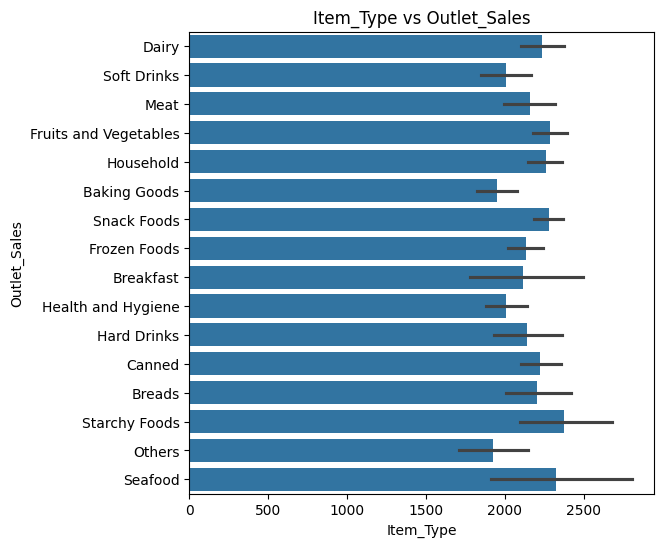

In [55]:
#creating a bar plot of item type vs outlet sales
plt.figure(figsize=(6,6))
sns.barplot(x='Item_Outlet_Sales',y='Item_Type',data=train).set(title="Item_Type vs Outlet_Sales")
#setting the axis label
plt.xlabel('Item_Type')
plt.ylabel('Outlet_Sales')
# to rotate the x axis to avoid overlapping
plt.show()


#Correlation Heatmap

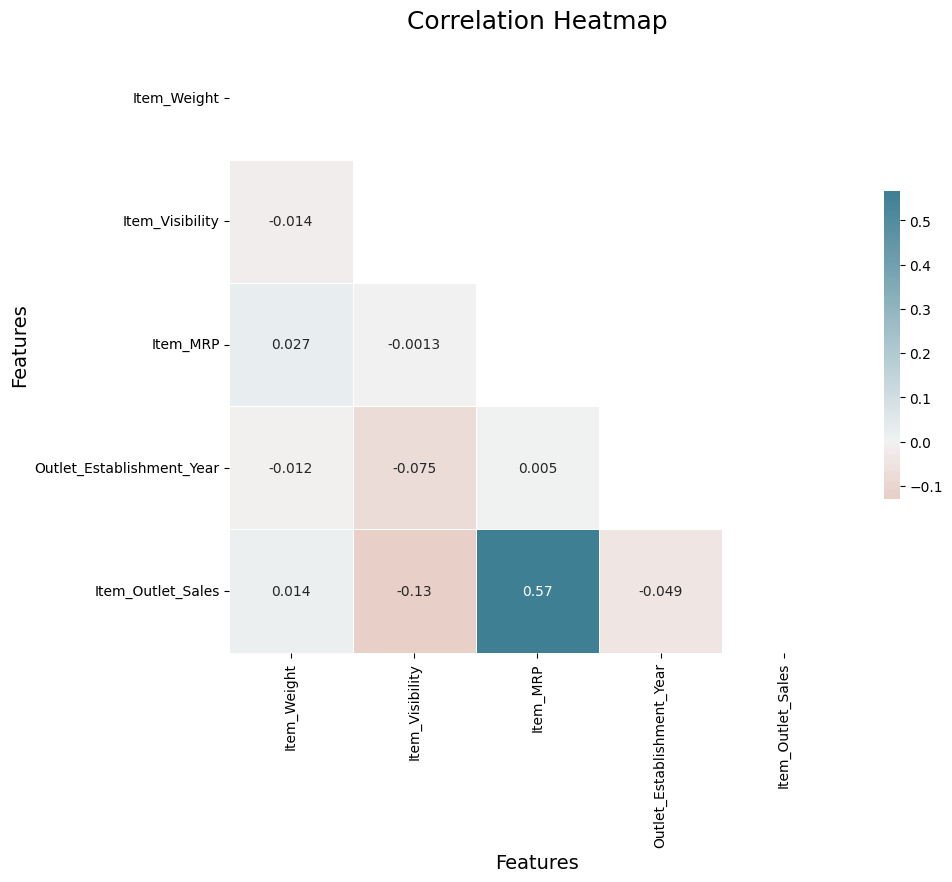

In [56]:
# Subset the dataset to include only the relevant columns, excluding non-numerical ones
subset = train[['Item_Weight', 'Item_Visibility', 'Item_MRP',
             'Outlet_Establishment_Year', 'Item_Outlet_Sales']] # Removed 'Outlet_sales_cube' as it does not exist

# Calculate the correlation matrix
corr = subset.corr()

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the heatmap with green and white colors
sns.heatmap(corr, mask=mask, annot=True, cmap=sns.diverging_palette(20, 220, n=200),
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title and labels for the plot
ax.set_title("Correlation Heatmap", fontsize=18)
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Features", fontsize=14)

# Show the plot
plt.show()

# Feature Engineering

In [57]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube,Outlet_sales_sqrt
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,15.515611,15.515611,61.115775
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,7.625576,7.625576,21.057607
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,12.800240,12.800240,45.795961
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.013888,9.013888,27.062520
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,9.982319,9.982319,31.538947


In [58]:
train['Outlet_Age']=train['Outlet_Establishment_Year'].apply(lambda year: 2024- year)
 #lambda fun will be executed each and every record
#lambda data type in outlet establishment year

In [59]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube,Outlet_sales_sqrt,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,15.515611,15.515611,61.115775,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,7.625576,7.625576,21.057607,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,12.800240,12.800240,45.795961,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.013888,9.013888,27.062520,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,9.982319,9.982319,31.538947,37


In [60]:
train=train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight'],axis=1)
# to remove a column we use drop
# item and outlet identifier have an unique and unwanted list so we remove that
# we also drop establishment year because we get an outlet age by the establishment year so drop year column


In [61]:
train=train.drop(['Item_Visibility','Outlet_sales_sqrt'],axis=1) #normalistion feature scaling for the decision tree
 #standard scaling is normal all the vlues by 1 like 0.003


In [62]:
train.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube,Outlet_Age
0,Low Fat,Dairy,249.8092,Tier 1,Supermarket Type1,3735.1380,15.515611,15.515611,25
1,Regular,Soft Drinks,48.2692,Tier 3,Supermarket Type2,443.4228,7.625576,7.625576,15
2,Low Fat,Meat,141.6180,Tier 1,Supermarket Type1,2097.2700,12.800240,12.800240,25
3,Regular,Fruits and Vegetables,182.0950,Tier 3,Grocery Store,732.3800,9.013888,9.013888,26
4,Low Fat,Household,53.8614,Tier 3,Supermarket Type1,994.7052,9.982319,9.982319,37


In [63]:
test.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [64]:
test['Outlet_Age']=test['Outlet_Establishment_Year'].apply(lambda year: 2024- year)
 #lambda fun will be executed each and every record
#lambda data type in outlet establishment year


In [65]:
test=test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight'],axis=1)
# to remove a column we use drop
# item and outlet identifier have an unique and unwanted list so we remove that
# we also drop establishment year because we get an outlet age by the establishment year so drop year column

#STANDARD NORMAL DISTRIBUTION

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
x=train[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type','Outlet_Age']]
y=train['Outlet_Sales_Cube']


In [68]:
x = pd.get_dummies(x,
                   columns=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type'],
                   drop_first=True)  # 'drop_first=True' helps avoid multicollinearity

In [69]:
scalar=StandardScaler()
# to scaling the data properly


In [70]:
x=scalar.fit_transform(x)
# that scaled transform is fit into the variable x


In [71]:
x=pd.DataFrame(x)
# by using pandas library


In [72]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.747454,-0.139541,-0.738147,-0.174193,-0.114346,-0.287094,3.390733,-0.334137,-0.411066,-0.160484,...,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.696678,-0.804732,0.726802,-0.349551,-0.351028
1,-1.489023,-1.334103,1.354743,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,...,-0.142232,-0.086982,-0.404805,4.260611,-0.132935,-0.696678,1.242650,-1.375891,2.860816,-0.351028
2,0.010040,-0.139541,-0.738147,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,...,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.696678,-0.804732,0.726802,-0.349551,-0.351028
3,0.660050,-0.020085,1.354743,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,2.432698,-0.160484,...,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.696678,1.242650,-1.375891,-0.349551,-0.351028
4,-1.399220,1.293934,-0.738147,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,...,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.696678,1.242650,0.726802,-0.349551,-0.351028


In [73]:
print(x)

            0         1         2         3         4         5         6   \
0     1.747454 -0.139541 -0.738147 -0.174193 -0.114346 -0.287094  3.390733   
1    -1.489023 -1.334103  1.354743 -0.174193 -0.114346 -0.287094 -0.294922   
2     0.010040 -0.139541 -0.738147 -0.174193 -0.114346 -0.287094 -0.294922   
3     0.660050 -0.020085  1.354743 -0.174193 -0.114346 -0.287094 -0.294922   
4    -1.399220  1.293934 -0.738147 -0.174193 -0.114346 -0.287094 -0.294922   
...        ...       ...       ...       ...       ...       ...       ...   
8518  1.180783  1.293934 -0.738147 -0.174193 -0.114346 -0.287094 -0.294922   
8519 -0.527301 -0.497909  1.354743 -0.174193 -0.114346 -0.287094 -0.294922   
8520 -0.897208 -0.736822 -0.738147 -0.174193 -0.114346 -0.287094 -0.294922   
8521 -0.607977 -1.334103  1.354743 -0.174193 -0.114346 -0.287094 -0.294922   
8522 -1.052261  0.099372 -0.738147 -0.174193 -0.114346 -0.287094 -0.294922   

            7         8         9   ...        13        14    

In [74]:
X=test[['Item_Fat_Content', 'Item_Visibility','Item_Type','Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Age',]]


In [75]:
X=pd.DataFrame(X)

In [76]:
X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Age
0,Low Fat,0.007565,Snack Foods,107.8622,Supermarket Type1,Tier 1,25
1,Regular,0.038428,Dairy,87.3198,Supermarket Type1,Tier 2,17
2,Low Fat,0.099575,Others,241.7538,Grocery Store,Tier 3,26
3,Low Fat,0.015388,Snack Foods,155.0340,Supermarket Type1,Tier 2,17
4,Regular,0.118599,Dairy,234.2300,Supermarket Type3,Tier 3,39


In [77]:
print(X)

     Item_Fat_Content  Item_Visibility           Item_Type  Item_MRP  \
0             Low Fat         0.007565         Snack Foods  107.8622   
1             Regular         0.038428               Dairy   87.3198   
2             Low Fat         0.099575              Others  241.7538   
3             Low Fat         0.015388         Snack Foods  155.0340   
4             Regular         0.118599               Dairy  234.2300   
...               ...              ...                 ...       ...   
5676          Regular         0.013496         Snack Foods  141.3154   
5677          Regular         0.142991       Starchy Foods  169.1448   
5678          Low Fat         0.073529  Health and Hygiene  118.7440   
5679          Regular         0.000000              Canned  214.6218   
5680          Regular         0.104720              Canned   79.7960   

            Outlet_Type Outlet_Location_Type  Outlet_Age  
0     Supermarket Type1               Tier 1          25  
1     Supermarket

#Model building

In [78]:
from sklearn.linear_model import LinearRegression


In [79]:
# For evaluating the models using the metrics
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection  import cross_val_score as CVS


In [80]:
# Define the linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(x,y)

# Precting the model using the test set
X_predict = lr.predict(x)

# Evaluating the training set with the metric values

print("R-Square value on the training set: = ", lr.score(x,y))
print("----------------------------------------------------------------------------------------------")

# Use cross-validation to get the R-squared score
scores = CVS(lr, x, y, cv=5)
print('CV R-squared scores:', scores,"\n")
print('Average CV R-squared score:', np.mean(scores),"\n")

R-Square value on the training set: =  0.6836019907244341
----------------------------------------------------------------------------------------------
CV R-squared scores: [0.68621883 0.67137797 0.66971881 0.6826275  0.6945923 ] 

Average CV R-squared score: 0.6809070824559694 



In [81]:
import pickle # to saving all project

In [82]:
Bigmart="Bigmart_Analysis.sav"
pickle.dump(lr,open(Bigmart,'wb'))

#Summary

Over all the project is to analysis the supermarkets inputs and outputs. Whuch is the part of machine learing, in these we have made the analysis and we are inputing them to the machine which is said to be machine language.